## **Predict the lowest price**
https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-the-lowest-price/submissions/
Problem

A leading global leader of e-commerce has over 150 million paid subscription users. One of the many perks of the subscription is the privilege of buying products at lower prices. For an upcoming sale, the organization has decided to promote local artisans and their products, to help them through these tough times. However, slashed prices may impact local artists.

To not let discounts affect local artists, the company has decided to determine the lowest price at which a particular good can be sold. Your task is to build a predictive model using Machine Learning that helps them set up a lowest-pricing model for these products.

You have to predict the Low_Cap_Price column.


**Data files**

The dataset folder consists of the following files:

Train.csv: Contains training data [9798 x 9] that must be used to build the model

Test.csv: Contains test data [5763 x 8] to be predicted on

sample_submission.csv: Contains sample submission format with dummy values filled for test data

##Importing Libraries

In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **Data Perprocessing**

# Step-1 load the dataset to pandas data frame

In [2]:
Data_Sets = pd.read_csv("Train.csv")  # Train Data Sets
print(Data_Sets.head())



  Item_Id        Date  State_of_Country  ...  Demand  Low_Cap_Price  High_Cap_Price
0    IT_1  2007-07-05                 0  ...     0.5           2785            4240
1    IT_2  2007-07-05                 0  ...     0.7           3574            4756
2    IT_3  2007-07-05                 0  ...     1.6           5978            9669
3    IT_4  2007-07-05                 0  ...     0.0           5681            8313
4    IT_5  2007-07-05                 0  ...     0.0           4924            7257

[5 rows x 9 columns]


In [47]:
Test_Data_Sets=pd.read_csv("Test.csv") # Test Data Sets
Test_Data_Sets.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,IT_265079,2014-01-19,0,3,0,0,0.1,5303
1,IT_265087,2014-01-19,0,268,0,2,1.4,10492
2,IT_265107,2014-01-19,0,320,0,0,13.4,24706
3,IT_265139,2014-01-19,17,358,0,3,5.5,23464
4,IT_265142,2014-01-19,18,23,5,2,0.0,6222


# Understanding Data_set using Pandas Lib

In [3]:
print(Data_Sets.shape)


(9798, 9)


In [4]:
print(Data_Sets.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item_Id           9798 non-null   object 
 1   Date              9798 non-null   object 
 2   State_of_Country  9798 non-null   int64  
 3   Market_Category   9798 non-null   int64  
 4   Product_Category  9798 non-null   int64  
 5   Grade             9798 non-null   int64  
 6   Demand            9798 non-null   float64
 7   Low_Cap_Price     9798 non-null   int64  
 8   High_Cap_Price    9798 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 689.0+ KB
None


In [5]:
print(Data_Sets.describe())



       State_of_Country  Market_Category  ...  Low_Cap_Price  High_Cap_Price
count       9798.000000      9798.000000  ...    9798.000000     9798.000000
mean          14.278730       198.414064  ...    3500.273525     6349.838028
std            8.760964       169.767862  ...    2188.046803     3652.780956
min            0.000000         0.000000  ...       1.000000      163.000000
25%            3.000000        55.000000  ...    1863.250000     3878.250000
50%           20.000000       129.000000  ...    3124.000000     5552.500000
75%           21.000000       389.000000  ...    4667.500000     7993.750000
max           23.000000       471.000000  ...   17580.000000    58812.000000

[8 rows x 7 columns]


In [6]:
print(Data_Sets.tail())



       Item_Id        Date  ...  Low_Cap_Price  High_Cap_Price
9793  IT_95425  2010-06-08  ...            124             604
9794  IT_95456  2010-06-08  ...            225            1461
9795  IT_95457  2010-06-08  ...           4721            6637
9796  IT_95472  2010-06-08  ...           5082            6997
9797  IT_95488  2010-06-09  ...           3899            6380

[5 rows x 9 columns]


In [7]:
print(Data_Sets.corr())

                  State_of_Country  ...  High_Cap_Price
State_of_Country          1.000000  ...        0.027959
Market_Category           0.122124  ...        0.144557
Product_Category          0.205858  ...        0.114415
Grade                    -0.038140  ...        0.171083
Demand                   -0.002647  ...       -0.033971
Low_Cap_Price             0.234901  ...        0.721021
High_Cap_Price            0.027959  ...        1.000000

[7 rows x 7 columns]


# Drow Heatmap using seaborn Lib

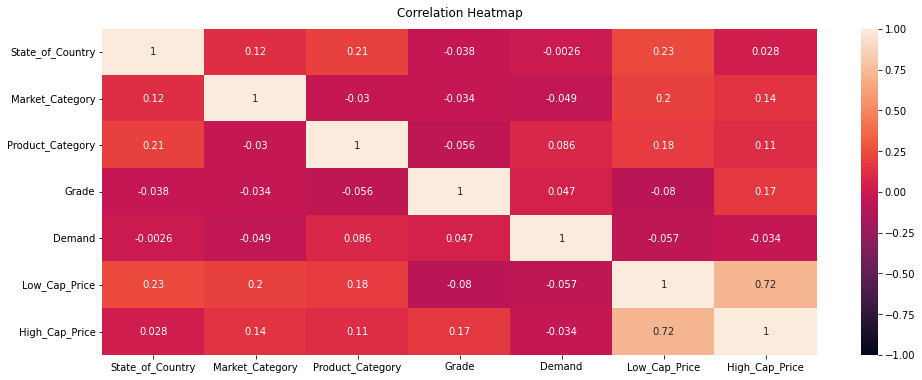

In [8]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(Data_Sets.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig("correlation_heatmap.png")




##**Analysis of missing values (NaNs)**

In [50]:
# 2 step Replace a null value with a Null String.

print(Data_Sets.isnull().sum()) # Train Data Sets




Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Low_Cap_Price       0
High_Cap_Price      0
dtype: int64


In [51]:
print(Test_Data_Sets.isna().sum()) # Test Data Sets

Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
High_Cap_Price      0
dtype: int64


# Drow PairPlot

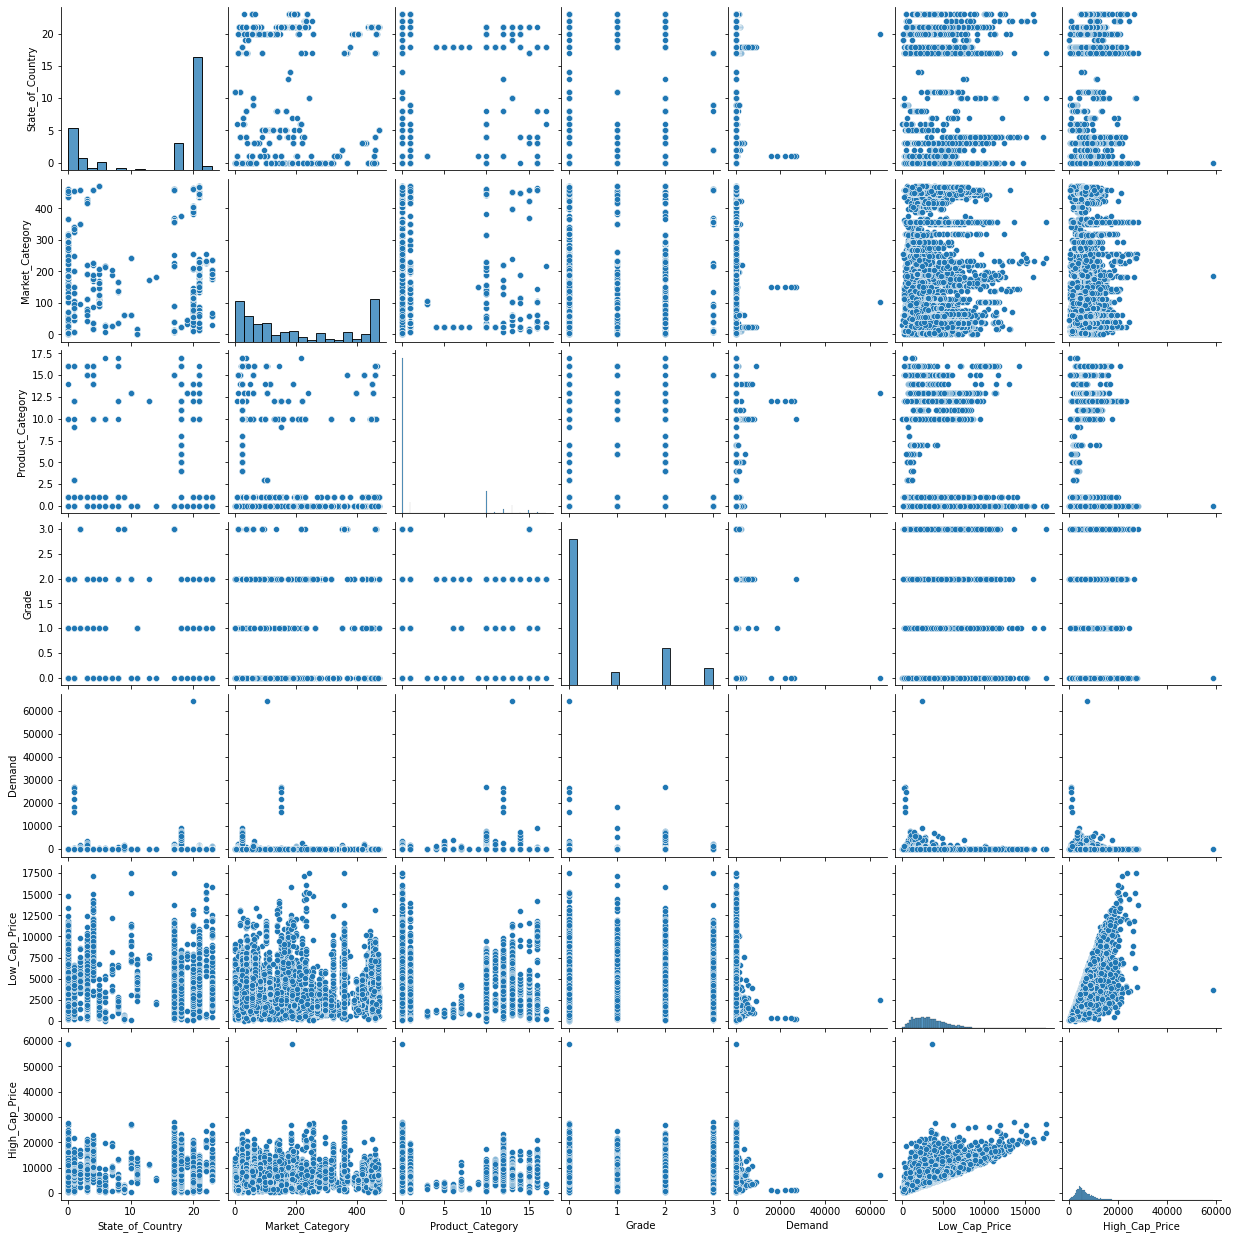

In [77]:
PairPlot= sns.pairplot(Data_Sets,height=2.5)
#sns.show()


##**Features Seleaction**
Seleact Required Features form data_Sets to build a model that can predict the prices of the different packages

Find Depandent and Indepandent variables using datasets,where x are independent values and y : dependent values

In [11]:
X=Data_Sets.drop(["Low_Cap_Price"],axis=1)
X.head()


,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,7257


In [12]:
# Removing useless columns for data sets

New_X=Data_Sets.drop(['Item_Id','Date','Low_Cap_Price'],axis=1)

New_X.head()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,0,0,0,0,0.5,4240
1,0,1,0,0,0.7,4756
2,0,103,0,1,1.6,9669
3,0,103,0,0,0.0,8313
4,0,103,0,2,0.0,7257


In [10]:
y=Data_Sets["Low_Cap_Price"]
y.head()

0    2785
1    3574
2    5978
3    5681
4    4924
Name: Low_Cap_Price, dtype: int64

## **Features Seleaction For Test Data Sets**
Seleact Required Features form data_Sets to build a model that can predict the lowest prices of the different Data



In [53]:
New_Test_DataSets = Test_Data_Sets.drop(['Item_Id','Date'],axis=1)

In [57]:
New_Test_DataSets.shape

(5763, 6)

## **Setp 4 Train Test Split Dataset**

In [13]:
# Split the Data As Train data and test Data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(New_X,y  ,test_size=0.2, random_state=0)


##***Machine Learning Models***

##**Linear Regression**

In [26]:
# Using multi linear regression as the values are continuous where x are independent values and y : dependent values

# ******************* Model Train Using Linear Regression *************************

from sklearn.linear_model import LinearRegression
Model=LinearRegression()
Model.fit(X_train,y_train)

#Prediction

LR_Y_Pred = Model.predict(X_test)

# ********************* End LR ****************************************************


##**Random Forest Regressor**

In [27]:
# ******************* Model Train Using Random Forest Regression Model *************************

from sklearn.ensemble import RandomForestRegressor

clf2 = RandomForestRegressor(bootstrap= True,max_depth=10, max_features=6, n_estimators=400,min_samples_leaf=6,min_samples_split=12, random_state=10,ccp_alpha=0,n_jobs=-1) 
clf2.fit(X_train,y_train)

#Prediction

Y_Pred=clf2.predict(X_test)

# ********************* End RFR ****************************************************




RandomForestRegressor(ccp_alpha=0, max_depth=10, max_features=6,
                      min_samples_leaf=6, min_samples_split=12,
                      n_estimators=400, n_jobs=-1, random_state=10)

##**LGBM Regressor**

In [43]:
# ******************* Model Train Using LGBM Regression *************************

from lightgbm import LGBMRegressor
LGBM_Model=LGBMRegressor()
LGBM_Model.fit(X_train,y_train)

#Prediction

LGBMR_Y_Pred=LGBM_Model.predict(X_test)

from sklearn.metrics import r2_score
LGBMR_Accuracy=r2_score(y_test,LGBMR_Y_Pred)c
LGBMR_Accuracy

# ********************* End LGBMR Model ****************************************************



0.851408722786043

##**Prediction Test Data**

In [62]:
Y_Test_Pred=LGBM_Model.predict(New_Test_DataSets)
Y_Test_Pred = pd.Series(Y_Test_Pred)
Y_Test_Pred

0       3380.390525
1       2078.869397
2       5104.591082
3       8647.047470
4       2382.788730
           ...     
5758    7328.876441
5759    6151.455985
5760    6659.488022
5761    5920.710222
5762    7838.641953
Length: 5763, dtype: float64

##**Create 'csv' file using Item Id and Low_Cap_Price  form Test_DataSets**

In [64]:
CSV_File=pd.DataFrame(data={'Item_ID':Test_Data_Sets.Item_Id , 'Low_Cap_Price': Y_Test_Pred })
CSV_File

,Item_ID,Low_Cap_Price
0,IT_265079,3380.390525
1,IT_265087,2078.869397
2,IT_265107,5104.591082
3,IT_265139,8647.047470
4,IT_265142,2382.788730
...,...,...
5758,IT_361691,7328.876441
5759,IT_361694,6151.455985
5760,IT_361699,6659.488022
5761,IT_361719,5920.710222


In [66]:
CSV_File.to_csv("Finally_Submission.csv")

##**Evaluation Criteria**

In [70]:
from sklearn.metrics import r2_score , mean_squared_log_error

RFR_accuracy=r2_score(y_test,Y_Pred)

LR_accuracy=r2_score(y_test,LR_Y_Pred)

LGBMR_Accuracy=r2_score(y_test,LGBMR_Y_Pred)

MSLE=mean_squared_log_error(y_test,LGBMR_Y_Pred)

print("mean_squared_log_error is :",MSLE)


print("Random Forest Regressor Model Accuracy is : ",RFR_accuracy)
print("Linear Regression Model Accuracy is : ",LR_accuracy)
print("LGBM Regressor Model Accuracy is : ",LGBMR_Accuracy)

mean_squared_log_error is : 0.07859352325523554
Random Forest Regressor Model Accuracy is :  0.8257218447110605
Linear Regression Model Accuracy is :  0.5544298508205914
LGBM Regressor Model Accuracy is :  0.851408722786043


##**Evaluation metric**

Score = max(0,(100 - mean_squared_log_error))

In [76]:
Score = max(0,(100 - MSLE))

print("Score is : ",Score)

Score is :  99.92140647674476
